In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
# import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Wrapper for sklearn (use scikeras instead of keras.wrappers)
from scikeras.wrappers import KerasClassifier                            # These are the common libraries used in deep learning projects

In [2]:
#Digit MNIST dataset 
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()   #Loading the dataset from mnist
# Train set input =X_train_digit, Train set output =y_train_digit
# Test set input =X_test_digit, Test set output =y_test_digit


In [3]:
X_train_digit[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

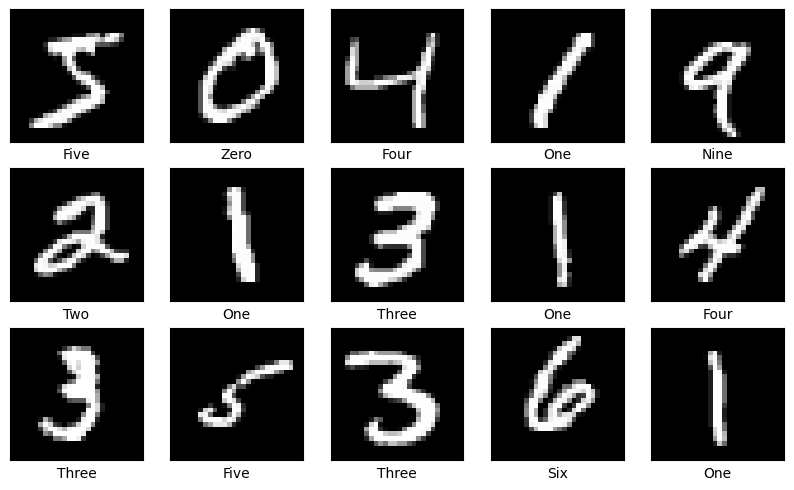

In [5]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()                    #This graph shows the digit images from the dataset.

In [6]:
X_train_digit.shape    #.shape shows the total number of rows and columns in X_train_digit
                       #  60000 is count , 28 rows , 28 columns.

(60000, 28, 28)

In [7]:
X_train_digit = X_train_digit.reshape(60000, 784) #  Preprocessing step:   we convert 3D to 2D  by flattening the rows and columns
X_test_digit = X_test_digit.reshape(10000, 784)   # he number of training/test images remains the same

In [8]:
X_train_digit.shape

(60000, 784)

In [9]:
y_test_digit.shape    # Output test set has a 1D array, so we need to convert it into one-hot encoding

(10000,)

In [10]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10) # Input labels are 1D arrays → need to convert into one-hot encoded 2D arrays

In [11]:
y_train_digit[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
#importing keras and layer from Tensorflow
#keras is a high-level deep learning Application Programming Interface
#layers is a submodule inside Keras
from tensorflow import keras
from tensorflow.keras import layers


In [13]:
#Creating base neural network                                  # TThis is the brain or main procedure of the project
model = keras.Sequential([                                     #In Deep Learning, this works like brain activity .
    layers.Dense(256, activation='relu', input_shape=(784,)),  #Deep Learning is a sequential process.
    #layers.Dropout(0.3),                                      #Dense 256 is means 256 neurons, and ReLU acts as the activation function
    #layers.BatchNormalization(),                  
     layers.Dense(64, activation='relu'),               # This line is the input layer and first hidden layer
    #layers.Dropout(0.3),                               # Dense 64 is the second hidden layer, next line is the third hidden layer
    #layers.BatchNormalization(),                       # This continues until the last line, which is the output layer
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),              # This is the output layer
])

C:\sabeen\envs\aiml\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
#param_number = output_channel_number * (input_channel_number + 1)
model.summary()       #It shows the summary of all layers in the model, including input, hidden, and output.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",                       # This is the second step in Deep Learning
              metrics = ['accuracy'])                 # Prepares the model for training by setting loss, optimizer, and metrics.

In [16]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))
# The fit() method is where the learning process happens.
# We pass the input here, and both feedforward and backpropagation take place.

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8515 - loss: 1.4446 - val_accuracy: 0.9201 - val_loss: 0.3390
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9331 - loss: 0.2564 - val_accuracy: 0.9431 - val_loss: 0.2407
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9521 - loss: 0.1702 - val_accuracy: 0.9368 - val_loss: 0.2475
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9603 - loss: 0.1303 - val_accuracy: 0.9516 - val_loss: 0.1916
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9647 - loss: 0.1093 - val_accuracy: 0.9537 - val_loss: 0.1853
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9704 - loss: 0.0944 - val_accuracy: 0.9520 - val_loss: 0.2042
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9683 - loss: 0.0944 - val_accuracy: 0.9531 - val_loss: 0.1955
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9667 - loss: 0.0871 - val_accuracy: 0

In [17]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)
# After training, we start testing the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [18]:
y_predict[6]

array([0.12897871, 0.21062642, 0.02125761, 0.00146059, 0.9966373 ,
       0.01108531, 0.9455163 , 0.10476322, 0.5750336 , 0.07887755],
      dtype=float32)

In [19]:
y_predicts=np.argmax(y_predict, axis=1) # We take the index of the largest value in the encoded vector.
#passing the Predicted test set data 
#  Converting from one-hot encoding to category numbers

In [20]:
y_predicts   

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)
# passing the Actual test set data 
# Converting from one-hot encoding to category numbers

In [22]:
y_test_digit_eval   

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

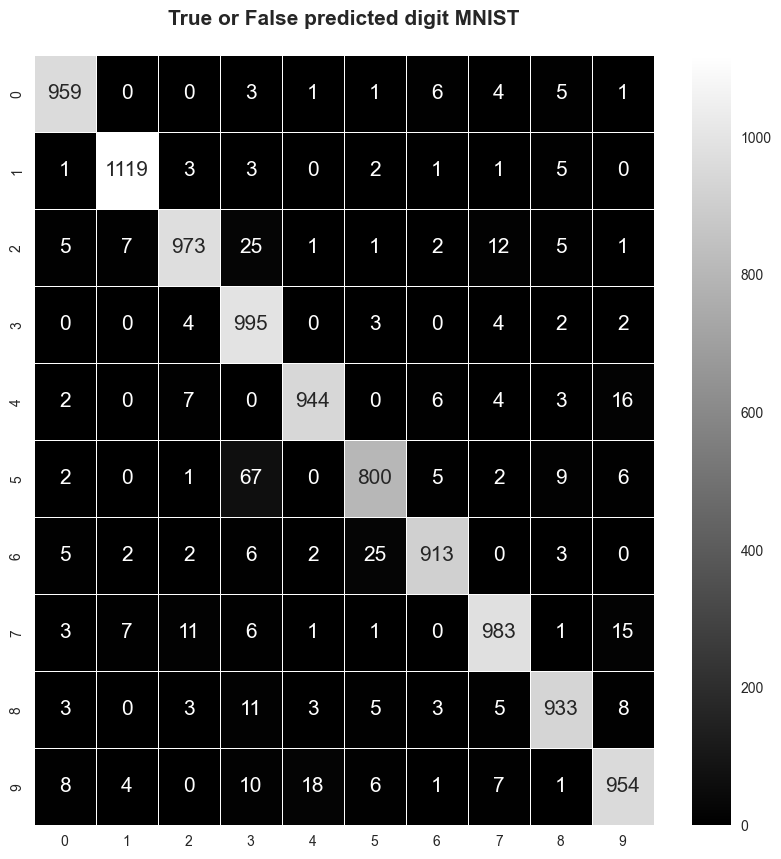

In [23]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()  # We created a heatmap to visualize the confusion matrix.

In [24]:
from sklearn.metrics import classification_report # 

print(classification_report(y_test_digit_eval,y_predicts))  # This is the classification_report. It shows precision, recall, f1-score, and accuracy for each class

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.94      0.96      1032
           3       0.88      0.99      0.93      1010
           4       0.97      0.96      0.97       982
           5       0.95      0.90      0.92       892
           6       0.97      0.95      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



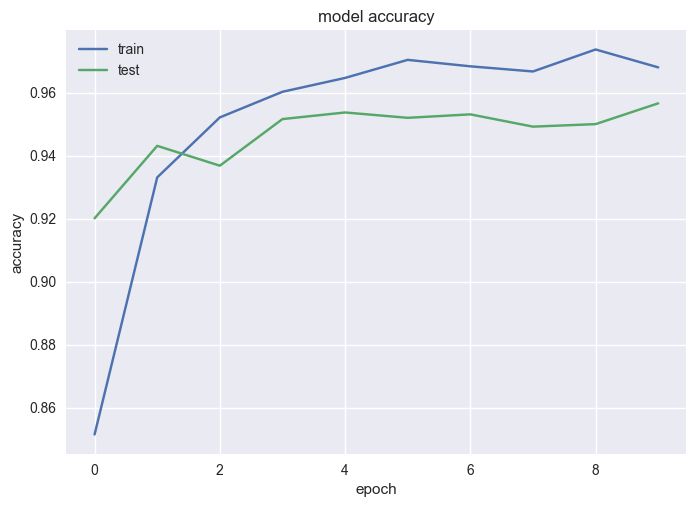

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# This graph shows the accuracy of the model.
# It usually increases as the number of epochs increases.

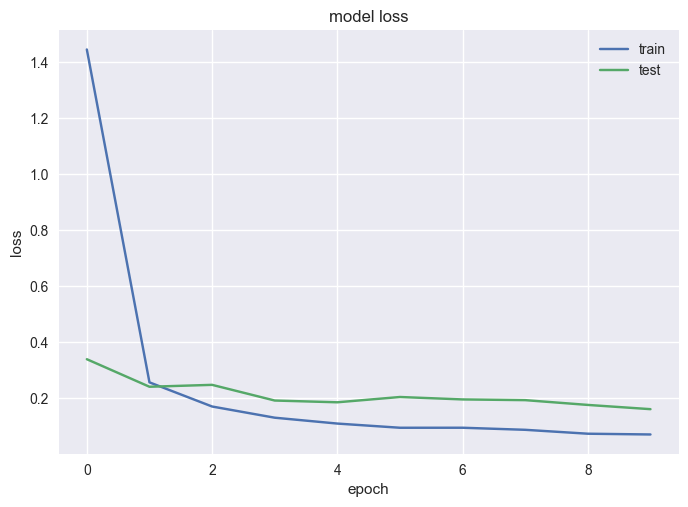

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# This graph shows the Loss of the model.
# It usually decreases as the number of epochs increases.

In [27]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)     #Converts test labels from one-hot encoding to class labels
# Predicting a single test digit and comparing with actual class label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


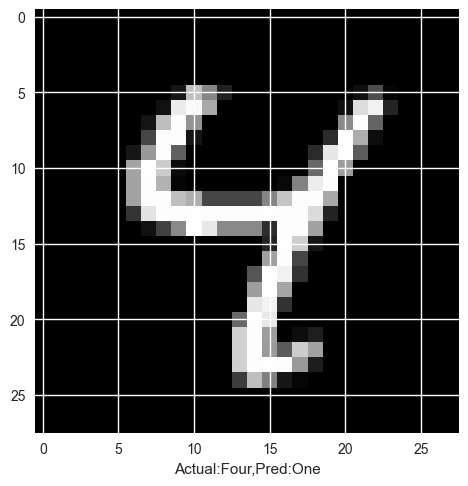

In [28]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[6].reshape(28,28), cmap='gray')         # Visualizing the digit in grayscale and showing actual vs predicted labels
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[6])],col_names[y_predicts_single[0]]))
plt.show()